In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from nsdmd import utils
from nsdmd import nsdmd

In [2]:
sr = 1000
f1 = 17
t1 = np.arange(0,2000)
phi_1 = np.ones((100,len(t1)))
phi_1[:50] = phi_1[:50] * np.linspace(1,4,len(t1))
phi_1[50:] = phi_1[50] * np.linspace(4,1,len(t1))
f2 = 30
t2 = np.arange(0,2000)
phi_2 = np.ones((100,len(t2)))
phi_2[:50] = phi_2[:50] * np.linspace(3,2,len(t2))
phi_2[50:] = phi_2[50] * np.linspace(1,4,len(t2))

net1, F1_true, _ = utils.make_network(f1, len(t1), \
                   phi_1, \
                   np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-30,30,10)]]))
net2, F2_true, _ = utils.make_network(f2, len(t2), \
                   phi_2, \
                   np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-10,50,10)]]))
x = np.zeros((100,2000))
x[:,t1] += net1
x[:,t2] += net2
x = utils.add_noise(x, std=0.1)
t = np.arange(x.shape[1]) / sr

Text(0, 0.5, 'Channel')

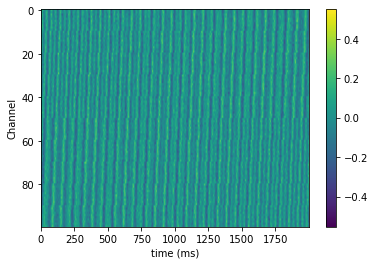

In [3]:
plt.imshow(x, aspect='auto')
plt.colorbar()
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0.5, 1.0, 'Phi Amp: 17 Hz')

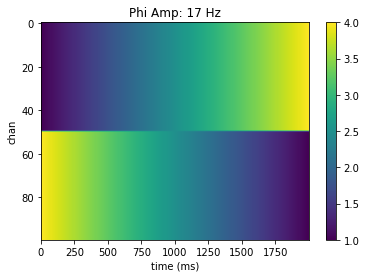

In [4]:
plt.imshow(phi_1, aspect='auto')
plt.colorbar()
plt.ylabel('chan')
plt.xlabel('time (ms)')
plt.title('Phi Amp: '+str(f1)+' Hz')

Text(0.5, 1.0, 'Phi Amp: 30 Hz')

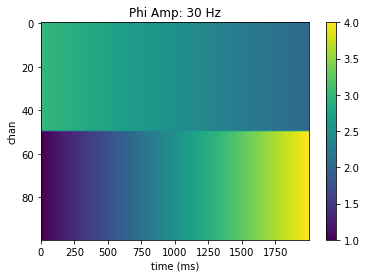

In [5]:
plt.imshow(phi_2, aspect='auto')
plt.colorbar()
plt.ylabel('chan')
plt.xlabel('time (ms)')
plt.title('Phi Amp: '+str(f2)+' Hz')

In [6]:
model = nsdmd.NSDMD(opt_rank=4, sim_thresh_phi_amp=0.92)
model.fit_opt(x, t, sr)

Text(0.5, 1.0, 'Similar Solutions')

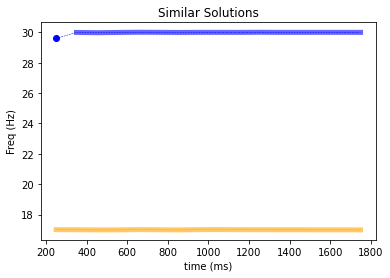

In [7]:
group_idx = nsdmd.group_by_similarity(model.freqs_, model.phis_, \
                                      model.sim_thresh_freq, model.sim_thresh_phi_amp)

x_extent = np.mean(model.windows_, axis=1)
colors = ['blue', 'orange']
for i in range(0,len(group_idx),2):
    plt.plot(x_extent, model.freqs_[:,i], linestyle='dashed', color=colors[i//2], linewidth=0.5)
    for g in group_idx[i]:
        if(len(g)>1):
            plt.plot(x_extent[g], model.freqs_[g,i], color=colors[i//2], linewidth=5, alpha=0.6)
        else:
            plt.scatter(x_extent[g], model.freqs_[g,i], color=colors[i//2])
            
plt.xlabel('time (ms)')
plt.ylabel('Freq (Hz)')
plt.title('Similar Solutions')

In [8]:
model.fit_reduction(x, len(t), sr)

Text(0, 0.5, 'Cosine Distance')

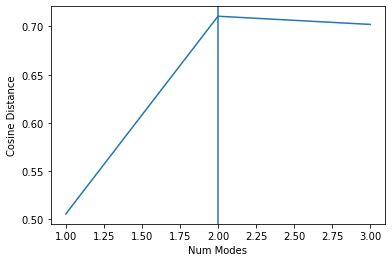

In [20]:
plt.plot(model.num_modes_, model.errors_)
plt.axvline(2)
plt.xlabel('Num Modes')
plt.ylabel('Cosine Distance')

In [10]:
model.fit_f(x, len(t), sr, 2)

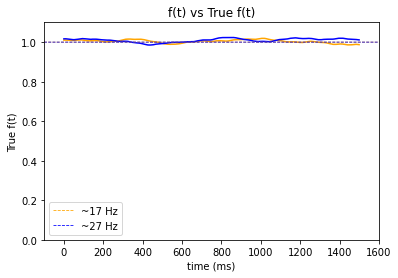

In [11]:
colors = ['orange', 'blue', 'blue', 'green', 'blue', 'green']
for i,f in enumerate(model.f_hat_[:,250:-250]):
    plt.plot(f, color=colors[i])

plt.plot(t1-250, np.mean(F1_true, axis=0), color=colors[0], label='~17 Hz', linestyle='dashed', linewidth=0.8)
plt.plot(t2-250, np.mean(F2_true, axis=0), color=colors[1], label='~27 Hz', linestyle='dashed', linewidth=0.8)
plt.legend()
plt.xlim(-100,1600)
plt.ylim(0,1.1)
plt.xlabel('time (ms)')
plt.ylabel('True f(t)')
plt.title('f(t) vs True f(t)')
plt.savefig('recentImage')

In [12]:
freq_hat, phi_hat = model.get_freq_and_phi(len(t), sr)

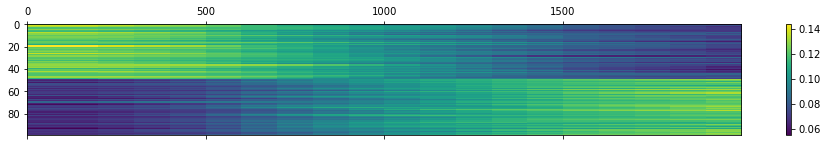

In [13]:
plt.matshow(np.abs(phi_hat[0]).T, aspect='auto')
plt.colorbar()

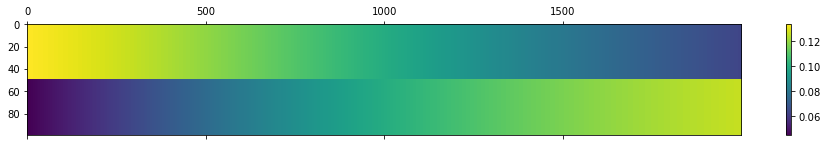

In [14]:
plt.matshow(phi_2 / np.sum(phi_2**2, axis=0)**0.5, aspect='auto')
plt.colorbar()

Text(0.5, 1.0, 'Average Across Channels, 17 Hz')

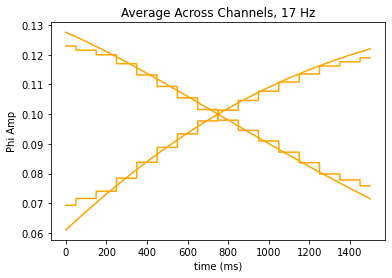

In [15]:
temp = np.mean(np.abs(phi_hat[0][:,:50]), axis=1)
plt.plot(temp[250:-250], color='orange')
temp = np.mean(np.abs(phi_hat[0][:,50:]), axis=1)
plt.plot(temp[250:-250], color='orange')
plt.plot((phi_2 / np.sum(phi_2**2, axis=0)**0.5)[0,250:-250], color='orange')
plt.plot((phi_2 / np.sum(phi_2**2, axis=0)**0.5)[-1,250:-250], color='orange')

plt.xlabel('time (ms)')
plt.ylabel('Phi Amp')
plt.title('Average Across Channels, 17 Hz')

Text(0.5, 1.0, 'Average Across Channels, 30 Hz')

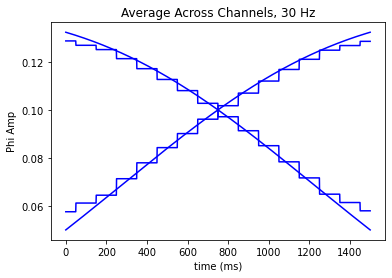

In [16]:
temp = np.mean(np.abs(phi_hat[1][:,:50]), axis=1)
plt.plot(temp[250:-250], color='blue')
temp = np.mean(np.abs(phi_hat[1][:,50:]), axis=1)
plt.plot(temp[250:-250], color='blue')
plt.plot((phi_1 / np.sum(phi_1**2, axis=0)**0.5)[0,250:-250], color='blue')
plt.plot((phi_1 / np.sum(phi_1**2, axis=0)**0.5)[-1,250:-250], color='blue')

plt.xlabel('time (ms)')
plt.ylabel('Phi Amp')
plt.title('Average Across Channels, 30 Hz')

In [17]:
x_rec = model.transform(x, len(t), sr)

Text(0, 0.5, 'Channel')

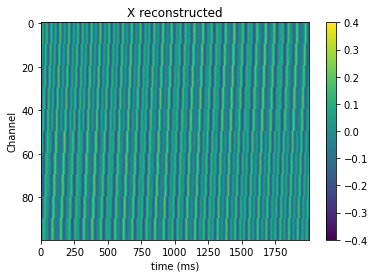

In [18]:
plt.imshow(x_rec, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X reconstructed')
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0, 0.5, 'Channel')

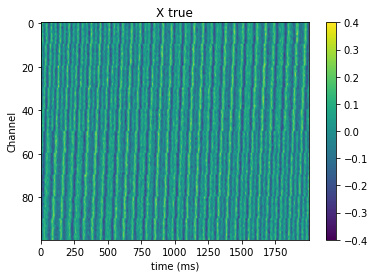

In [19]:
plt.imshow(x, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X true')
plt.xlabel('time (ms)')
plt.ylabel('Channel')